<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/BostonHousing_PCA%2Bregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.linalg as la
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

def corr_c(dataframe):
    flist = dataframe.columns
    corr_coefficient = pd.DataFrame(np.zeros((len(dataframe.columns),len(dataframe.columns))))
    corr_coefficient.columns = flist
    corr_coefficient.index = flist
    col_length=len(dataframe.columns)
    for idx in range(col_length):
        for col in range(col_length):
            corr_coefficient.iloc[idx,col] = stats.pearsonr(dataframe[flist[idx]], dataframe[flist[col]])[0]
    return corr_coefficient
            
def corr_p(dataframe):
    flist = dataframe.columns
    corr_coefficient = pd.DataFrame(np.zeros((len(dataframe.columns),len(dataframe.columns))))
    corr_coefficient.columns = flist
    corr_coefficient.index = flist
    col_length=len(dataframe.columns)
    for idx in range(col_length):
        for col in range(col_length):
            corr_coefficient.iloc[idx,col] = stats.pearsonr(dataframe[flist[idx]], dataframe[flist[col]])[1]
    return corr_coefficient

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
BostonHousing = pd.read_csv("/content/BostonHousingData.csv", encoding='utf-8')
features=BostonHousing.iloc[:, 0:13]

In [ ]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
flist=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
country=list(BostonHousing['Class'])
BostonHousing_data=pd.DataFrame(BostonHousing.iloc[:,0:13], columns=flist)

In [ ]:
# covariance 구하기
BS_cov = BostonHousing_data.cov()
# correlation 구하기
BS_corr = BostonHousing_data.corr(method = "pearson")
# 앞에값이 고유값, 뒤에값이 고유벡터   
result_cov = la.eig(BS_cov)
# eigenvalues
result_cov[0]
# eigenvectors
result_cov[1]
cov_eigenvalues, cov_eigenvectors=la.eig(BS_cov)

In [ ]:
cov_eigenvalues_sum = np.sum(cov_eigenvalues)

In [ ]:
# 고유벡터의 설명률
cov_variance_per=(cov_eigenvalues/cov_eigenvalues_sum)
cov_cum_variance_per=(cov_eigenvalues/cov_eigenvalues_sum).cumsum()

cov_cum_table=pd.DataFrame({'Eigenvalues':cov_eigenvalues, 'Variance_percent':cov_variance_per,
                            'Cumulative_variance_percent':cov_cum_variance_per})


In [ ]:
result_corr=la.eig(BS_corr)

corr_eigenvalues, corr_eigenvectors=la.eig(BS_corr)

corr_eigenvalues_sum = np.sum(corr_eigenvalues)

In [ ]:
corr_variance_per=(corr_eigenvalues/corr_eigenvalues_sum)
corr_cum_variance_per=(corr_eigenvalues/corr_eigenvalues_sum).cumsum()
corr_cum_table=pd.DataFrame({'Eigenvalues':corr_eigenvalues, 'Variance_percent':corr_variance_per,
                            'Cumulative_variance_percent':corr_cum_variance_per})
# 여기까지 고유벡터와 고유값을 구하는 것을 알 수 있다.

In [ ]:
### PCA with Scikit-Learn
# 모든변수사용
# PCA using covariance matrix
from sklearn.decomposition import PCA
pca_cov = PCA()
pca_cov.fit(BostonHousing_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# pca하기 전과 비교
pca_cov.explained_variance_ratio_

array([8.05823175e-01, 1.63051968e-01, 2.13486092e-02, 6.95699061e-03,
       1.29995193e-03, 7.27220158e-04, 4.19044539e-04, 2.48538539e-04,
       8.53912023e-05, 3.08071548e-05, 6.65623182e-06, 1.56778461e-06,
       7.96814208e-08])

In [ ]:
pca_cov.explained_variance_

array([3.08899113e+04, 6.25033006e+03, 8.18363958e+02, 2.66684838e+02,
       4.98315275e+01, 2.78767934e+01, 1.60633859e+01, 9.52731770e+00,
       3.27333185e+00, 1.18094181e+00, 2.55155742e-01, 6.00984544e-02,
       3.05445673e-03])

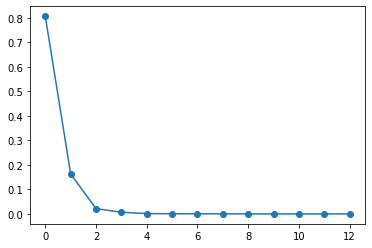

In [ ]:
# scree plots
plt.plot(range(len(pca_cov.explained_variance_ratio_)),pca_cov.explained_variance_ratio_, marker='o')


In [ ]:
pca_cov_=pca_cov.fit_transform(BostonHousing_data)[:, 0:2]
features_cov = pd.concat([BostonHousing_data, pd.DataFrame(pca_cov_, columns = ['PC1', 'PC2'])], 1)


In [ ]:
loading_cov = corr_c(features_cov)
loading_cov_p = corr_p(features_cov)

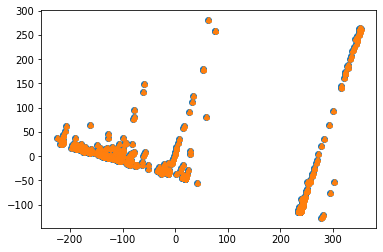

In [ ]:
# pc1 vs pc2 plot
plt.scatter(pca_cov_[:,0], pca_cov_[:,1])
plt.scatter(pca_cov_[:,:1],pca_cov_[:,1:2], marker=r'$\clubsuit$')

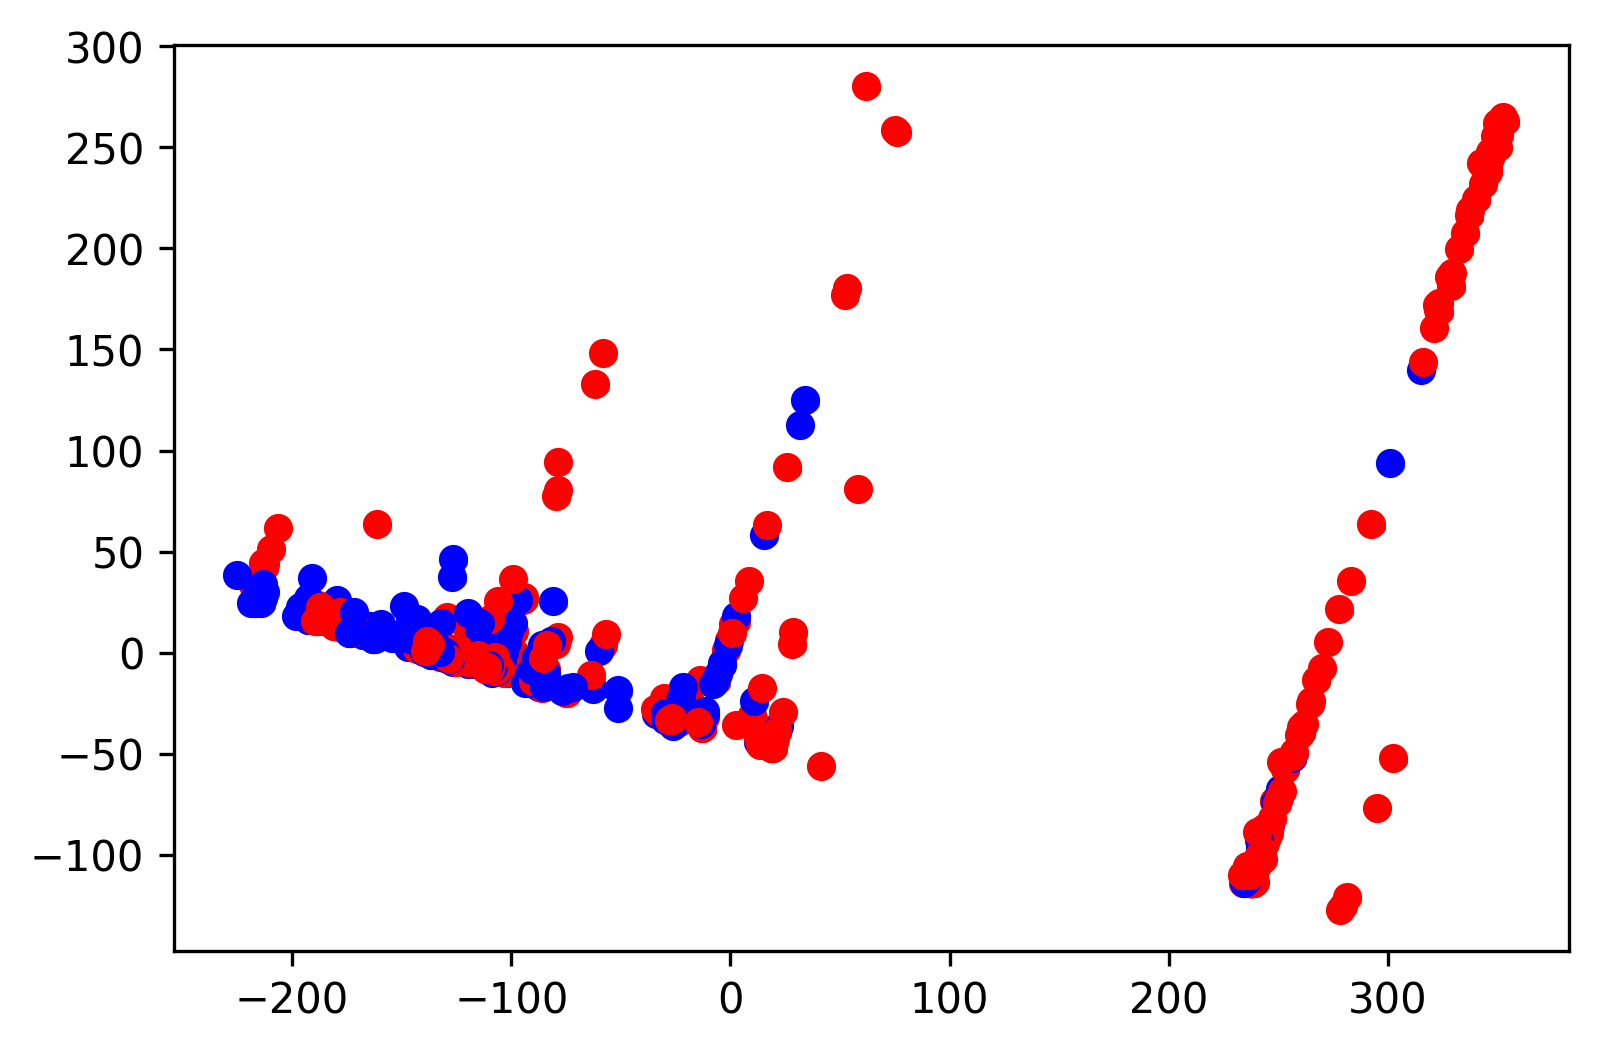

In [ ]:
plt.figure(dpi=300)
for idx,x in enumerate(pca_cov_[:,:1]):
    y=pca_cov_[:,1:2][idx]
    plt.scatter(x, y, marker=r'$\clubsuit$')
    if (country[idx] == 'High'):
        plt.plot(x+0.2,y,'o', color = 'blue')
    else:
        plt.plot(x+0.2,y,'o', color = 'red')

PCA + Regression

In [ ]:
BostonHousing = pd.read_csv("/content/BostonHousingData.csv", encoding='utf-8')
features=BostonHousing.iloc[:, 0:14]
flist=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
BostonHousing_data=pd.DataFrame(BostonHousing.iloc[:,0:14], columns=flist)
del BostonHousing_data['MEDV']

In [ ]:
BostonHousing_target=pd.DataFrame(BostonHousing['MEDV'], columns=['MEDV'])


In [ ]:
BostonHousing_data = StandardScaler().fit_transform(BostonHousing_data)
pca = PCA()
pca.fit(BostonHousing_data)
pca.explained_variance_


array([6.1389812 , 1.43611329, 1.2450773 , 0.85927328, 0.83646904,
       0.65870897, 0.5364162 , 0.39688167, 0.27749173, 0.22067394,
       0.18638271, 0.16963823, 0.06363502])

In [ ]:
pca.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

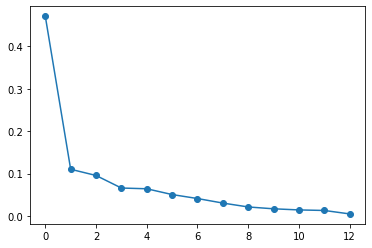

In [ ]:
#scree plot
plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_, marker='o')
pca_=pca.fit_transform(BostonHousing_data)[:,0:2]


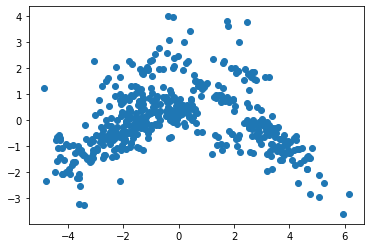

In [ ]:
plt.scatter(pca_[:,:1],pca_[:,1:2])

In [ ]:
pc_data = sm.add_constant(pca_)

In [ ]:
model_Boston = sm.OLS(BostonHousing_target, pc_data)
result_Boston = model_Boston.fit()
result_Boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     210.7
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           3.39e-67
Time:                        05:47:59   Log-Likelihood:                -1686.3
No. Observations:                 506   AIC:                             3379.
Df Residuals:                     503   BIC:                             3391.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.302     74.563      0.000      21.939      23.127
x1            -2.2708      0.122    -18.599      0.000      -2.511      -2.031
x2             2.1927      0.252      8.687      0.000       1.697       2.689
==============================================================================
Omnibus:                      192.617   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              676.621
Skew:                           1.767   Prob(JB):                    1.18e-147
Kurtosis:                       7.427   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

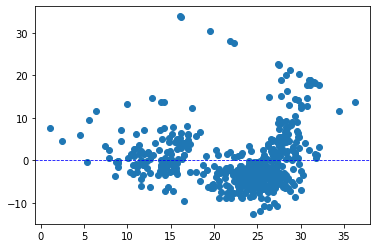

In [ ]:
pred = result_Boston.predict(pc_data)
resid = result_Boston.resid
plt.scatter(pred, resid)
plt.axhline(y=0, color='b', linewidth=0.8, linestyle='--')

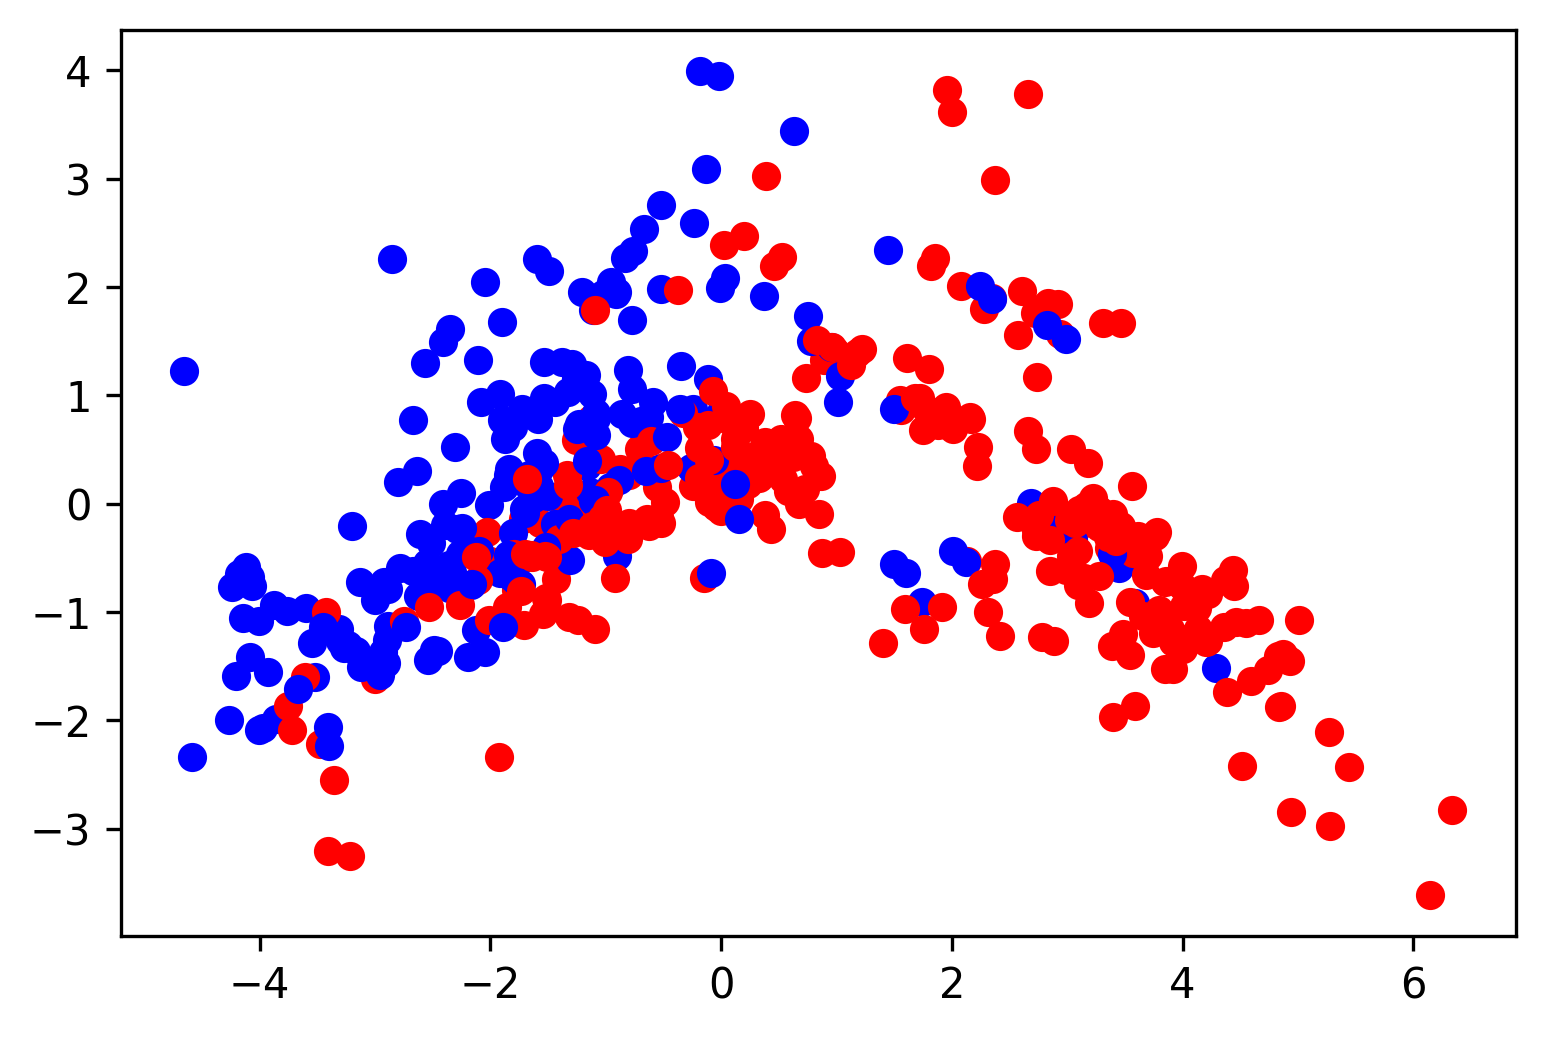

In [ ]:
plt.figure(dpi=300)
for idx,x in enumerate(pca_[:,:1]):
    y=pca_[:,1:2][idx]
    # plt.scatter(x,y)
    if (country[idx] == 'High'):
        plt.plot(x+0.2,y,'o', color = 'blue')
    else:
        plt.plot(x+0.2,y,'o', color = 'red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


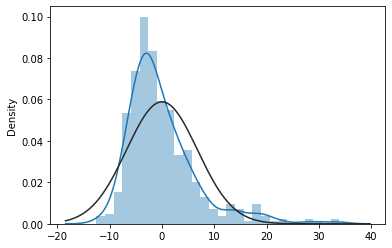

In [ ]:
#정규분표 Barplot
sns.distplot(resid, fit=stats.norm)
plt.show()

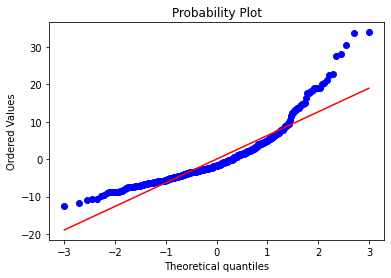

In [ ]:
#QQ-plot
stats.probplot(resid, plot=plt)
plt.show()